In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ban-th annotated data/Cleaner_Folder_1/banTH_nmt_dataset.csv")

print(df.isna().sum())
null_rows = df[df.isnull().any(axis=1)]
null_rows

Text                  0
Label                 0
Political             0
Religious             0
Gender                0
Personal Offense      0
Abusive/Violence      0
Origin                0
Body Shaming          0
Misc                  0
Text_without_emoji    0
bangla                0
english               0
dtype: int64


,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,Text_without_emoji,bangla,english


In [ ]:
df.dropna(inplace=True)

In [ ]:
for column in df.columns:
  print(column)
  print(df[column].nunique())

Text
37350
Label
2
Political
2
Religious
2
Gender
2
Personal Offense
2
Abusive/Violence
2
Origin
2
Body Shaming
2
Misc
2
Text_without_emoji
37324
bangla
37096
english
36349


In [ ]:
columns_to_convert = ['Label', 'Political', 'Religious', 'Gender', 'Personal Offense', 'Abusive/Violence', 'Origin', 'Body Shaming', 'Misc']
columns_to_check = ['Political', 'Religious', 'Gender', 'Personal Offense', 'Abusive/Violence', 'Origin', 'Body Shaming', 'Misc']
# Convert floating-point values to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)
# Check for rows where Label == 0
label_0_check = df[(df['Label'] == 0) & (df[columns_to_check] != 0).any(axis=1)]

# Check for rows where Label == 1 but all category columns are zero
label_1_check = df[(df['Label'] == 1) & (df[columns_to_check] == 0).all(axis=1)]

label_0_check

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,Text_without_emoji,bangla,english


In [ ]:
label_1_check

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,Text_without_emoji,bangla,english


In [ ]:
# df1 = pd.read_excel("/content/drive/MyDrive/ban-th annotated data/Cleaned_Folder/BanTH_Fabiha.xlsx")
# df2 = pd.read_excel("/content/drive/MyDrive/ban-th annotated data/Cleaned_Folder/BanTH_Sourove.xlsx")

# combined_df = pd.concat([df1, df2], ignore_index=True)
# combined_df = combined_df[['Text']]
# combined_df
# combined_df.to_excel('/content/drive/MyDrive/ban-th annotated data/Cleaned_Folder/new_only_texts.xlsx')

In [ ]:
import pandas as pd
import os

# Path to the folder containing Excel files
folder_path = '/content/drive/MyDrive/ban-th annotated data/Cleaned_Folder'

# Initialize an empty list to hold dataframes from each sheet
all_sheets = []

# Iterate through each file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.xlsx'):  # Check for Excel files only
        file_path = os.path.join(folder_path, file)
        if file_path == '/content/drive/MyDrive/ban-th annotated data/BanTH_all_annotated_only_texts.xlsx' or file_path == '/content/drive/MyDrive/ban-th annotated data/combined_file.xlsx':
          continue

        # Load the Excel file
        xls = pd.ExcelFile(file_path)

        # Iterate through each sheet in the Excel file
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            all_sheets.append(df)

# Concatenate all sheets into one DataFrame
combined_df = pd.concat(all_sheets, ignore_index=True)

print("All sheets from multiple files have been combined into 'combined_file.xlsx'.")


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


All sheets from multiple files have been combined into 'combined_file.xlsx'.


In [ ]:
 df

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,Text_without_emoji,bangla,english
0,Tui kothay salar bata dasa sso,1,0,0,0,1,1,0,0,0,Tui kothay salar bata dasa sso,তুই কোথায় শালার বেটা দেশে আসো,Where are you son of a bitch?
1,Tui achuda hala 😅akta sagol😅baccah😅,1,0,0,0,1,0,0,0,0,Tui achuda hala akta sagolbaccah,তুই আচুদা হালা একটা ছাগলবাচ্চা😅😅😅,You fucking idiot.😅😅😅
2,Student ra amon kori 😢😢😢 desh sadhin korlo stu...,0,0,0,0,0,0,0,0,0,Student ra amon kori desh sadhin korlo studen...,স্টুডেন্ট রা এরকম করি দেশ স্বাধীন করলো স্টুডেন...,"Students did this, liberated the country, Stu..."
3,Suorer bassa toi,1,0,0,0,1,0,0,0,0,Suorer bassa toi,শুওরের বাচ্চা তুই,You son of a bitch.
4,are bhai ege chakri sarlay na kane,0,0,0,0,0,0,0,0,0,are bhai ege chakri sarlay na kane,আরে ভাই আগে চাকরি ছাড়লে না কেন,Why didn't you quit earlier?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37345,Ha thick bolcen apu...or upor allahr lanot p...,1,0,1,0,0,1,0,0,0,Ha thick bolcen apu...or upor allahr lanot p...,হ্যাঁ ঠিক বলছেন আপু...ওর উপর আল্লাহর লানত পরু...,"""Yes, sister..."
37346,😂😂😂 hedar catro league,1,1,0,0,0,0,0,0,0,hedar catro league,হ্যাডার ছাত্র লীগ😂😂😂,Hader Student League😂😂😂
37347,ei madarchod re dorkar,1,0,0,0,1,1,0,0,0,ei madarchod re dorkar,এই মাদারচোদ রে দরকার,I need this motherfucker.
37348,koi tui bhuski,1,0,0,0,1,0,0,1,0,koi tui bhuski,কই তুই ভুস্কি,Where are you Vuski?


In [ ]:
df.isna().sum()

,0
Text,0
Label,0
Political,0
Religious,0
Gender,0
Personal Offense,0
Abusive/Violence,0
Origin,0
Body Shaming,0
Misc,0


In [ ]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,Text_without_emoji,bangla,english


In [ ]:
df.dropna(inplace=True)

In [ ]:
for column in df.columns:
  print(column)
  print(df[column].nunique())

Text
37350
Label
2
Political
2
Religious
2
Gender
2
Personal Offense
2
Abusive/Violence
2
Origin
2
Body Shaming
2
Misc
2
Text_without_emoji
37324
bangla
37096
english
36349


In [ ]:
columns_to_convert = ['Label', 'Political', 'Religious', 'Gender', 'Personal Offense', 'Abusive/Violence', 'Origin', 'Body Shaming', 'Misc']

# Convert floating-point values to integers
combined_df[columns_to_convert] = combined_df[columns_to_convert].astype(int)
combined_df

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc
0,Satthro andolon nama\nAllahuka soron korun \nR...,0,0,0,0,0,0,0,0,0
1,Gopalgonje dhal toloar nie mohora dieshish bol...,0,0,0,0,0,0,0,0,0
2,"Jamat,jamat, jamat \n2024",0,0,0,0,0,0,0,0,0
3,Ostad Sikhaya dia gase \nAkhon ostad e mair kh...,0,0,0,0,0,0,0,0,0
4,Samsara para deo,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
37352,Amra kon duniate bas kori.Taka kheye ghus khay...,1,0,0,0,1,0,0,0,0
37353,Apu apni kosto ader ar interview neyen na ar k...,1,0,0,0,1,0,0,0,0
37354,"Pura pagol...or brain cell baki asei r 2ta,tao...",1,0,0,0,1,0,0,0,0
37355,"Mathai ghol,,,r e baba oi je medical doctor ho...",1,0,0,0,1,0,0,0,0


In [ ]:
# Check for rows where Label == 0
label_0_check = combined_df[(combined_df['Label'] == 0) & (combined_df.iloc[:, 2:] != 0).any(axis=1)]

# Check for rows where Label == 1
label_1_check = combined_df[(combined_df['Label'] == 1) & (combined_df.iloc[:, 2:] == 0).all(axis=1)]

label_0_check

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc


In [ ]:
label_1_check

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc


In [ ]:
combined_df

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc
0,Satthro andolon nama\nAllahuka soron korun \nR...,0,0,0,0,0,0,0,0,0
1,Gopalgonje dhal toloar nie mohora dieshish bol...,0,0,0,0,0,0,0,0,0
2,"Jamat,jamat, jamat \n2024",0,0,0,0,0,0,0,0,0
3,Ostad Sikhaya dia gase \nAkhon ostad e mair kh...,0,0,0,0,0,0,0,0,0
4,Samsara para deo,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
37352,Amra kon duniate bas kori.Taka kheye ghus khay...,1,0,0,0,1,0,0,0,0
37353,Apu apni kosto ader ar interview neyen na ar k...,1,0,0,0,1,0,0,0,0
37354,"Pura pagol...or brain cell baki asei r 2ta,tao...",1,0,0,0,1,0,0,0,0
37355,"Mathai ghol,,,r e baba oi je medical doctor ho...",1,0,0,0,1,0,0,0,0


In [ ]:
# Save the combined dataframe to a new Excel file
combined_df.to_excel('/content/drive/MyDrive/ban-th annotated data/combined_file.xlsx', index=False)


In [1]:
import pandas as pd

In [14]:
dataset_df = pd.read_csv('/content/drive/MyDrive/ban-th annotated data/Cleaner_Folder_1/banTH_nmt_dataset.csv')
dataset_df

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,Text_without_emoji,bangla,english
0,Tui kothay salar bata dasa sso,1,0,0,0,1,1,0,0,0,Tui kothay salar bata dasa sso,তুই কোথায় শালার বেটা দেশে আসো,Where are you son of a bitch?
1,Tui achuda hala 😅akta sagol😅baccah😅,1,0,0,0,1,0,0,0,0,Tui achuda hala akta sagolbaccah,তুই আচুদা হালা একটা ছাগলবাচ্চা😅😅😅,You fucking idiot.😅😅😅
2,Student ra amon kori 😢😢😢 desh sadhin korlo stu...,0,0,0,0,0,0,0,0,0,Student ra amon kori desh sadhin korlo studen...,স্টুডেন্ট রা এরকম করি দেশ স্বাধীন করলো স্টুডেন...,"Students did this, liberated the country, Stu..."
3,Suorer bassa toi,1,0,0,0,1,0,0,0,0,Suorer bassa toi,শুওরের বাচ্চা তুই,You son of a bitch.
4,are bhai ege chakri sarlay na kane,0,0,0,0,0,0,0,0,0,are bhai ege chakri sarlay na kane,আরে ভাই আগে চাকরি ছাড়লে না কেন,Why didn't you quit earlier?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37345,Ha thick bolcen apu...or upor allahr lanot p...,1,0,1,0,0,1,0,0,0,Ha thick bolcen apu...or upor allahr lanot p...,হ্যাঁ ঠিক বলছেন আপু...ওর উপর আল্লাহর লানত পরু...,"""Yes, sister..."
37346,😂😂😂 hedar catro league,1,1,0,0,0,0,0,0,0,hedar catro league,হ্যাডার ছাত্র লীগ😂😂😂,Hader Student League😂😂😂
37347,ei madarchod re dorkar,1,0,0,0,1,1,0,0,0,ei madarchod re dorkar,এই মাদারচোদ রে দরকার,I need this motherfucker.
37348,koi tui bhuski,1,0,0,0,1,0,0,1,0,koi tui bhuski,কই তুই ভুস্কি,Where are you Vuski?


In [3]:
print(dataset_df['Text'].nunique())

37350


In [15]:
result = {}

for column in dataset_df.columns:
    if column == 'Text' or column == 'Text_without_emoji' or column == 'bangla' or column == 'english':
        continue
    value_counts = dataset_df[column].value_counts()
    result[column] = value_counts.to_dict()

# Create a new DataFrame from the result
table_df = pd.DataFrame(result).T

table_df

,0,1
Label,26731,10619
Political,36144,1206
Religious,37200,150
Gender,37123,227
Personal Offense,30173,7177
Abusive/Violence,34418,2932
Origin,37123,227
Body Shaming,37227,123
Misc,37088,262


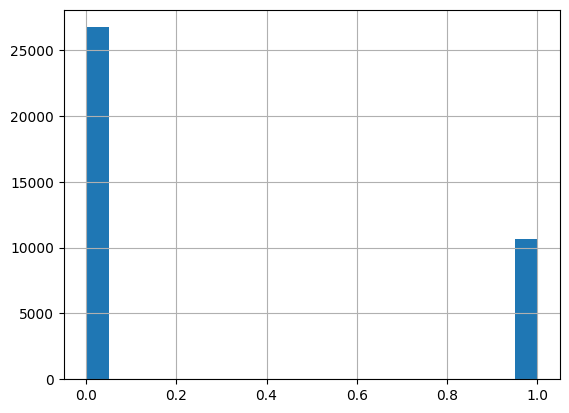

In [16]:
import matplotlib.pyplot as plt
dataset_df['Label'].hist(bins=20)
plt.show()

In [17]:
df = dataset_df.copy()  # Create a copy to avoid modifying the original
df.drop(columns = ['Text_without_emoji'], inplace = True)
df

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english
0,Tui kothay salar bata dasa sso,1,0,0,0,1,1,0,0,0,তুই কোথায় শালার বেটা দেশে আসো,Where are you son of a bitch?
1,Tui achuda hala 😅akta sagol😅baccah😅,1,0,0,0,1,0,0,0,0,তুই আচুদা হালা একটা ছাগলবাচ্চা😅😅😅,You fucking idiot.😅😅😅
2,Student ra amon kori 😢😢😢 desh sadhin korlo stu...,0,0,0,0,0,0,0,0,0,স্টুডেন্ট রা এরকম করি দেশ স্বাধীন করলো স্টুডেন...,"Students did this, liberated the country, Stu..."
3,Suorer bassa toi,1,0,0,0,1,0,0,0,0,শুওরের বাচ্চা তুই,You son of a bitch.
4,are bhai ege chakri sarlay na kane,0,0,0,0,0,0,0,0,0,আরে ভাই আগে চাকরি ছাড়লে না কেন,Why didn't you quit earlier?
...,...,...,...,...,...,...,...,...,...,...,...,...
37345,Ha thick bolcen apu...or upor allahr lanot p...,1,0,1,0,0,1,0,0,0,হ্যাঁ ঠিক বলছেন আপু...ওর উপর আল্লাহর লানত পরু...,"""Yes, sister..."
37346,😂😂😂 hedar catro league,1,1,0,0,0,0,0,0,0,হ্যাডার ছাত্র লীগ😂😂😂,Hader Student League😂😂😂
37347,ei madarchod re dorkar,1,0,0,0,1,1,0,0,0,এই মাদারচোদ রে দরকার,I need this motherfucker.
37348,koi tui bhuski,1,0,0,0,1,0,0,1,0,কই তুই ভুস্কি,Where are you Vuski?


In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset by label
df_0 = df[df['Label'] == 0]
df_1 = df[df['Label'] == 1]

# Split each label group into train, test, and val sets
X_train_0, X_test_val_0 = train_test_split(df_0, test_size=0.2, random_state=42)
X_test_0, X_val_0 = train_test_split(X_test_val_0, test_size=0.5, random_state=42)

X_train_1, X_test_val_1 = train_test_split(df_1, test_size=0.2, random_state=42)
X_test_1, X_val_1 = train_test_split(X_test_val_1, test_size=0.5, random_state=42)

# Combine the train, test, and val sets
X_train = pd.concat([X_train_0, X_train_1])
X_test = pd.concat([X_test_0, X_test_1])
X_val = pd.concat([X_val_0, X_val_1])

# Shuffle the datasets
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)
X_val = X_val.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
X_test

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english
0,Police 20 takar o ghush Khaile chakri theke Su...,1,0,0,0,1,0,0,0,0,পুলিশ ২০ টাকা ও ঘুস খাইলে চাকরি থেকে সাসপেন্ড ...,If a policeman gets 20 rupees and gets bribes...
1,Apnara ki gaja kheye news koren ? Sotti Mitha ...,1,0,0,0,1,0,0,0,0,আপনারা কি গাজা খেয়ে নিউজ করেন? সত্যি মিঠা যা...,Do you news by drinking Gaza? Instead of tell...
2,Kothay gela khomota go,0,0,0,0,0,0,0,0,0,কোথায় গেলে সুবিধা গো,Where's the advantage?
3,Myb eta India cal parar meye,1,0,0,0,1,0,1,0,0,মেইবি এটা ইন্ডিয়া চাল পাড়ার মেয়ে,This is India rice girl.
4,Tomar punishment sure 😂😂,0,0,0,0,0,0,0,0,0,তোমার শাস্তি নিশ্চিত😂😂,Your punishment is sure.😂😂
...,...,...,...,...,...,...,...,...,...,...,...,...
3730,"Police jono seba korbe kintu tara, kokhon o ...",0,0,0,0,0,0,0,0,0,"পুলিশ যেমন সেবা করবে কিন্তু তারা, কখন ও টাকা ...","As the police will serve but they, when and w..."
3731,vai atake jonogon bollena keno?durbitto bollen...,0,0,0,0,0,0,0,0,0,ভাই এটাকে জনগণ বললেনা কেন?দুর্বিনীত বললেন??আর ...,"Brother, why didn't you call it the people? S..."
3732,Nur vai asoleo akta jineyas,0,0,0,0,0,0,0,0,0,নূর ভাই আসলেই একটা জিনিয়াস,Noor Bhai is a genius.
3733,Akta baje mohila oni,1,0,0,0,1,0,0,0,0,একটা বাজে মহিলা উনি,She's a bad woman.


In [22]:
result = {}

for column in dataset_df.columns:
    if column == 'Text' or column == 'Text_without_emoji' or column == 'bangla' or column == 'english':
        continue
    value_counts = dataset_df[column].value_counts()
    result[column] = value_counts.to_dict()

# Create a new DataFrame from the result
table_df = pd.DataFrame(result).T

table_df

,0,1
Label,26731,10619
Political,36144,1206
Religious,37200,150
Gender,37123,227
Personal Offense,30173,7177
Abusive/Violence,34418,2932
Origin,37123,227
Body Shaming,37227,123
Misc,37088,262


In [ ]:
X_train.to_csv('/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/test.csv', index=False)
X_val.to_csv('/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/val.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_train = pd.read_csv("/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/test.csv")
df_val = pd.read_csv("/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/val.csv")
df_en_bn_en = pd.read_csv("/content/drive/MyDrive/ban-th annotated data/Cleaned_Folder/banTH_en_bn_en_bangla_idiom.csv")

In [ ]:
df_train

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc
0,Tui kothay salar bata dasa sso,1,0,0,0,1,0,0,0,0
1,Tui achuda hala 😅akta sagol😅baccah😅,1,0,0,0,1,0,0,0,0
2,Student ra amon kori 😢😢😢 desh sadhin korlo stu...,0,0,0,0,0,0,0,0,0
3,Suorer bassa toi,1,0,0,0,1,0,0,0,0
4,are bhai ege chakri sarlay na kane,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29880,Bharoter uchet bangladesh u tube chanel immedi...,1,0,0,0,0,0,1,0,1
29881,Khati obhinetar ar-/ bhat thakbe na..,0,0,0,0,0,0,0,0,0
29882,Ar likcen bnp,0,0,0,0,0,0,0,0,0
29883,moza pailam 😊😊😊,0,0,0,0,0,0,0,0,0


In [ ]:
df_en_bn_en[:100]

,Text,bangla,english
0,Satthro andolon nama\nAllahuka soron korun \nR...,সাতথ্রো আন্দোলন নাম আল্লাহ তা'আলা সরান করুন র...,Satthro Movement Remove the name Allah Allah ...
1,Gopalgonje dhal toloar nie mohora dieshish bol...,গোপালগঞ্জে ধল তোলোয়ার নিয়ে মোহর ডিসিশ বলে ত...,"In Gopalganj, you can catch the mohar discipl..."
2,"Jamat,jamat, jamat \n2024","জামাত, জামাত, জামাত ২০২৪","Jamaat, Jamaat, Jamaat 2024"
3,Ostad Sikhaya dia gase \nAkhon ostad e mair kh...,ওস্তাদ শিখাইয়া গেসে এখন ওস্তাদ এ মাইর খায় <...,The master taught him and now the master gets...
4,Samsara para deo,সামসারা পারা দাও,Samsara Para Dao
...,...,...,...
95,Etodin tora hatiar diye merechis r ekhon sadhi...,এতদিন তোরা হাতিয়ার দিয়ে মেরেছিস আর এখন স্বা...,So long you killed with weapons and now you b...
96,"Jara awamileegu kore, tader namer age Muhamm...","যারা আলেমিগু করে, তাদের নামের আগে মুহাম্মদ না...",Those who practice Alemigu do not say Muhamma...
97,Sadin banglar sadin sontras sadin gunda,সারাদিন বাংলার দিন সন্ধ্যা দিন সন্ধ্যা,All day long Bengal day day evening
98,Satrora to akn sadinota horon kotce thola krn ...,সবাই তো এখন শয়তানি হচ্ছে কেটে ফেলছে কারন আমি...,Everyone is now having devilry cutting down b...


In [ ]:
df_en_bn_en_idiom = pd.read_csv("/content/drive/MyDrive/ban-th annotated data/Cleaned_Folder/banTH_en_bn_en_bangla_idiom.csv")
df_en_bn_en_idiom[:100]

,Text,bangla,english
0,Satthro andolon nama\nAllahuka soron korun \nR...,সাতথ্রো আন্দোলন নাম আল্লাহ তা'আলা সরান করুন র...,Satthro Movement Remove the name Allah Allah ...
1,Gopalgonje dhal toloar nie mohora dieshish bol...,গোপালগঞ্জে ধল তোলোয়ার নিয়ে মোহর ডিসিশ বলে ত...,"In Gopalganj, you can catch the mohar discipl..."
2,"Jamat,jamat, jamat \n2024","জামাত, জামাত, জামাত ২০২৪","Jamaat, Jamaat, Jamaat 2024"
3,Ostad Sikhaya dia gase \nAkhon ostad e mair kh...,ওস্তাদ শিখাইয়া গেসে এখন ওস্তাদ এ মাইর খায় <...,The master taught him and now the master gets...
4,Samsara para deo,সামসারা পারা দাও,Samsara Para Dao
...,...,...,...
95,Etodin tora hatiar diye merechis r ekhon sadhi...,এতদিন তোরা হাতিয়ার দিয়ে মেরেছিস আর এখন স্বা...,So long you killed with weapons and now you b...
96,"Jara awamileegu kore, tader namer age Muhamm...","যারা আলেমিগু করে, তাদের নামের আগে মুহাম্মদ না...",Those who practice Alemigu do not say Muhamma...
97,Sadin banglar sadin sontras sadin gunda,সারাদিন বাংলার দিন সন্ধ্যা দিন সন্ধ্যা,All day long Bengal day day evening
98,Satrora to akn sadinota horon kotce thola krn ...,সবাই তো এখন শয়তানি হচ্ছে কেটে ফেলছে কারন আমি...,Everyone is now having devilry cutting down b...


In [ ]:
df_train = pd.merge(df_train, df_en_bn_en, on='Text', how='left')
df_train


,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english
0,Tui kothay salar bata dasa sso,1,0,0,0,1,0,0,0,0,তুই কোথায় শালার বেটা জানাসো,"Where are you, son of a bitch?"
1,Tui achuda hala 😅akta sagol😅baccah😅,1,0,0,0,1,0,0,0,0,তুই ফালতু হালা <unk> একটা পাগল <unk> বাচাহ <unk>,"You idiot, you're crazy, you save!"
2,Student ra amon kori 😢😢😢 desh sadhin korlo stu...,0,0,0,0,0,0,0,0,0,স্টুডেন্ট রা এমন করি <unk> у<unk> দেশ স্বাধীন...,Students do this<unk> у<unk> Students liberat...
3,Suorer bassa toi,1,0,0,0,1,0,0,0,0,উপরের বাসা তোই,To the upper house
4,are bhai ege chakri sarlay na kane,0,0,0,0,0,0,0,0,0,আরে ভাই আগে চক্র চালায় না কেন,Why don't you start the cycle first
...,...,...,...,...,...,...,...,...,...,...,...,...
29880,Bharoter uchet bangladesh u tube chanel immedi...,1,0,0,0,0,0,1,0,1,ভারতের বাইরে বাংলাদেশ ইউ টিউব চ্যানেল ইমাজিনল...,Bangladesh YouTube Channel should be immediat...
29881,Khati obhinetar ar-/ bhat thakbe na..,0,0,0,0,0,0,0,0,0,খাতি অভিযানের আর-/ ভাত থাকবে না..,The Khati campaign will no longer have rice..
29882,Ar likcen bnp,0,0,0,0,0,0,0,0,0,আর লিখসেন বিএনপি,And wrote BNP
29883,moza pailam 😊😊😊,0,0,0,0,0,0,0,0,0,মোজা পাইলাম!!!!!,I got socks!!!!


In [ ]:
df_train.isna().sum()

,0
Text,0
Label,0
Political,0
Religious,0
Gender,0
Personal Offense,0
Abusive/Violence,0
Origin,0
Body Shaming,0
Misc,0


In [ ]:
df_test = pd.merge(df_test, df_en_bn_en, on='Text', how='left')
df_test

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english
0,Shame awami Dalal.,1,1,0,0,1,0,0,0,0,লজ্জা আওয়ামী দালাল।,Shame Awami League broker
1,Apnara aisb nia at gatagati kora tik na..oi mo...,1,0,0,1,1,0,0,0,0,আপনারা আসবে নিয়ে এট গেটগাটি করা ঠিক না.. ওই ...,It's not right to be enthusiastic about you c...
2,Pottakta bebaga durgo goratola hok.,0,0,0,0,0,0,0,0,0,মোটটা বেবাগ দুর্গ গড়াতলা হোক।,Let the whole ruined fortress be built
3,Ai kutta ra sob somoy khone khone oder rong bo...,1,0,0,0,1,1,0,0,0,এই কুট্টা রা সব সময় খোঁজে খোঁজে ওদের রং বদলা...,These Kuttas always look for their colors and...
4,Jajakallah khairan youngstars. You guys making...,0,0,0,0,0,0,0,0,0,জাজাকাল্লাহ খায়রান ইয়াংস্টারস। ইউ গাইজ মেকি...,Jazaqallah Khayran Youngsters. You Guys Makin...
...,...,...,...,...,...,...,...,...,...,...,...,...
3730,Bhai abhabe chalai jan hoqe pothe . insha'All...,0,0,0,0,0,0,0,0,0,ভাই এমনভাবে চালালে জান হবে পথে। ইনশা'আল্লাহ ব...,"If my brother drives like this, we will be ab..."
3731,Auami ligke to nisiddho korechere vii,0,0,0,0,0,0,0,0,0,আমি লিগকে তো নিষিদ্ধ করেছে ভাই,I banned the league
3732,Or Kono khoma nai 😅😂,0,0,0,0,0,0,0,0,0,অর কোনো সুবিধা নাই <unk>,He has no advantage
3733,Tui jono sommukhe ayy notir pola😠😠😠😠,1,0,0,0,0,1,0,0,0,তুই যে সবার কাছে এই নোটির পোলা <unk> <unk> <u...,You're the son of this noti <unk><unk><unk><unk>


In [ ]:
df_test.isna().sum()

,0
Text,0
Label,0
Political,0
Religious,0
Gender,0
Personal Offense,0
Abusive/Violence,0
Origin,0
Body Shaming,0
Misc,0


In [ ]:
df_val = pd.merge(df_val, df_en_bn_en, on='Text', how='left')
df_val

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english
0,7mim to 7.27,0,0,0,0,0,0,0,0,0,৭মিম টু ৭.২৭,7mem to 7.27
1,Jei rajniti Kore kil gusi kaoa hoi oi rajniti ...,0,0,0,0,0,0,0,0,0,যেই রাজ্যটি করে কিল গুসি করা হয় ওই রাজ্যটি ক...,The kingdom that is kicking goosey does what ...
2,Akon kara dakati korse amra bangladeser sobay ...,0,0,0,0,0,0,0,0,0,এখন কারা দেখাতি করছে আমরা বাংলাদেশের সবাই খুব...,We are all in danger
3,President Ke Soran Noile Power Haraben,0,0,0,0,0,0,0,0,0,প্রেসিডেন্ট কে সোরান নাইলে পাওয়ার হারাবেন,President K Soran will lose power
4,Sumon babu akta valo nanush,0,0,0,0,0,0,0,0,0,সুমন বাবু একটা ভালো মানুষ,Suman Babu is a good man
...,...,...,...,...,...,...,...,...,...,...,...,...
3732,Indian channel dbc,0,0,0,0,0,0,0,0,0,ইন্ডিয়ান চ্যানেল ডিবিসি,Indian Channel DBC
3733,Apnito sotontro prathi apnar doshto dekhcina..,0,0,0,0,0,0,0,0,0,আপনার বর্তমান পৃথিবীতে আপনার কষ্ট দেখছিনা..,I don't see your pain in your present world
3734,Toi dese aai. Nonoir potul,0,0,0,0,0,0,0,0,0,তোই দেসে এই। নয়ের পুতুল,He gave me this nine doll
3735,Ha thick bolcen apu...or upor allahr lanot p...,1,0,1,0,0,1,0,0,0,হা থিক বলছেন আপু...অথবা উপরে আল্লাহর লানত পরু...,"Ha Thick, sister...or may God's curse be upon..."


In [ ]:
df_val.isna().sum()

,0
Text,0
Label,0
Political,0
Religious,0
Gender,0
Personal Offense,0
Abusive/Violence,0
Origin,0
Body Shaming,0
Misc,0


In [ ]:
df_train

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english
0,Tui kothay salar bata dasa sso,1,0,0,0,1,0,0,0,0,তুই কোথায় শালার বেটা জানাসো,"Where are you, son of a bitch?"
1,Tui achuda hala 😅akta sagol😅baccah😅,1,0,0,0,1,0,0,0,0,তুই ফালতু হালা <unk> একটা পাগল <unk> বাচাহ <unk>,"You idiot, you're crazy, you save!"
2,Student ra amon kori 😢😢😢 desh sadhin korlo stu...,0,0,0,0,0,0,0,0,0,স্টুডেন্ট রা এমন করি <unk> у<unk> দেশ স্বাধীন...,Students do this<unk> у<unk> Students liberat...
3,Suorer bassa toi,1,0,0,0,1,0,0,0,0,উপরের বাসা তোই,To the upper house
4,are bhai ege chakri sarlay na kane,0,0,0,0,0,0,0,0,0,আরে ভাই আগে চক্র চালায় না কেন,Why don't you start the cycle first
...,...,...,...,...,...,...,...,...,...,...,...,...
29880,Bharoter uchet bangladesh u tube chanel immedi...,1,0,0,0,0,0,1,0,1,ভারতের বাইরে বাংলাদেশ ইউ টিউব চ্যানেল ইমাজিনল...,Bangladesh YouTube Channel should be immediat...
29881,Khati obhinetar ar-/ bhat thakbe na..,0,0,0,0,0,0,0,0,0,খাতি অভিযানের আর-/ ভাত থাকবে না..,The Khati campaign will no longer have rice..
29882,Ar likcen bnp,0,0,0,0,0,0,0,0,0,আর লিখসেন বিএনপি,And wrote BNP
29883,moza pailam 😊😊😊,0,0,0,0,0,0,0,0,0,মোজা পাইলাম!!!!!,I got socks!!!!


In [ ]:
df_test

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english
0,Shame awami Dalal.,1,1,0,0,1,0,0,0,0,লজ্জা আওয়ামী দালাল।,Shame Awami League broker
1,Apnara aisb nia at gatagati kora tik na..oi mo...,1,0,0,1,1,0,0,0,0,আপনারা আসবে নিয়ে এট গেটগাটি করা ঠিক না.. ওই ...,It's not right to be enthusiastic about you c...
2,Pottakta bebaga durgo goratola hok.,0,0,0,0,0,0,0,0,0,মোটটা বেবাগ দুর্গ গড়াতলা হোক।,Let the whole ruined fortress be built
3,Ai kutta ra sob somoy khone khone oder rong bo...,1,0,0,0,1,1,0,0,0,এই কুট্টা রা সব সময় খোঁজে খোঁজে ওদের রং বদলা...,These Kuttas always look for their colors and...
4,Jajakallah khairan youngstars. You guys making...,0,0,0,0,0,0,0,0,0,জাজাকাল্লাহ খায়রান ইয়াংস্টারস। ইউ গাইজ মেকি...,Jazaqallah Khayran Youngsters. You Guys Makin...
...,...,...,...,...,...,...,...,...,...,...,...,...
3730,Bhai abhabe chalai jan hoqe pothe . insha'All...,0,0,0,0,0,0,0,0,0,ভাই এমনভাবে চালালে জান হবে পথে। ইনশা'আল্লাহ ব...,"If my brother drives like this, we will be ab..."
3731,Auami ligke to nisiddho korechere vii,0,0,0,0,0,0,0,0,0,আমি লিগকে তো নিষিদ্ধ করেছে ভাই,I banned the league
3732,Or Kono khoma nai 😅😂,0,0,0,0,0,0,0,0,0,অর কোনো সুবিধা নাই <unk>,He has no advantage
3733,Tui jono sommukhe ayy notir pola😠😠😠😠,1,0,0,0,0,1,0,0,0,তুই যে সবার কাছে এই নোটির পোলা <unk> <unk> <u...,You're the son of this noti <unk><unk><unk><unk>


In [ ]:
df_val

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc
0,7mim to 7.27,0,0,0,0,0,0,0,0,0
1,Jei rajniti Kore kil gusi kaoa hoi oi rajniti ...,0,0,0,0,0,0,0,0,0
2,Akon kara dakati korse amra bangladeser sobay ...,0,0,0,0,0,0,0,0,0
3,President Ke Soran Noile Power Haraben,0,0,0,0,0,0,0,0,0
4,Sumon babu akta valo nanush,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3732,Indian channel dbc,0,0,0,0,0,0,0,0,0
3733,Apnito sotontro prathi apnar doshto dekhcina..,0,0,0,0,0,0,0,0,0
3734,Toi dese aai. Nonoir potul,0,0,0,0,0,0,0,0,0
3735,Ha thick bolcen apu...or upor allahr lanot p...,1,0,1,0,0,1,0,0,0


In [ ]:
df_train.to_csv('/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/train.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/test.csv', index=False)
df_val.to_csv('/content/drive/MyDrive/ban-th annotated data/BanTH Dataset/val.csv', index=False)

In [ ]:
df_train['contains_link'] = df_train['Text'].str.contains(r'http[s]?://|www\.', na=False)

links_df = df_train[df_train['contains_link']]
df_train.drop(columns=['contains_link'], inplace=True)
links_df

,Text,Label,Political,Religious,Gender,Personal Offense,Abusive/Violence,Origin,Body Shaming,Misc,bangla,english,contains_link
24335,Owaoooo..... Howwww..... Gheuuuuu gheaoooooo.....,0,0,0,0,0,0,0,0,0,ওয়াওওও..... হাউওওওও.....ঘেউউউউউউউউউউউউউ..... ...,"Whoa, whoa, whoa, whoa, whoa, whoa, whoa, who...",True
